<h1>Principal component analysis (PCA)</h1>:<br/> Is a popular technique for analyzing large datasets containing a high number of dimensions/features per observation, increasing the interpretability of data while preserving the maximum amount of information, and enabling the visualization of multidimensional data. Formally, PCA is a statistical technique for reducing the dimensionality of a dataset. - <a href="https://en.wikipedia.org/wiki/Principal_component_analysis">Principal component analysis</a>

<b>PCA Demo:</b> <a href= "https://setosa.io/ev/principal-component-analysis/">Link</a>

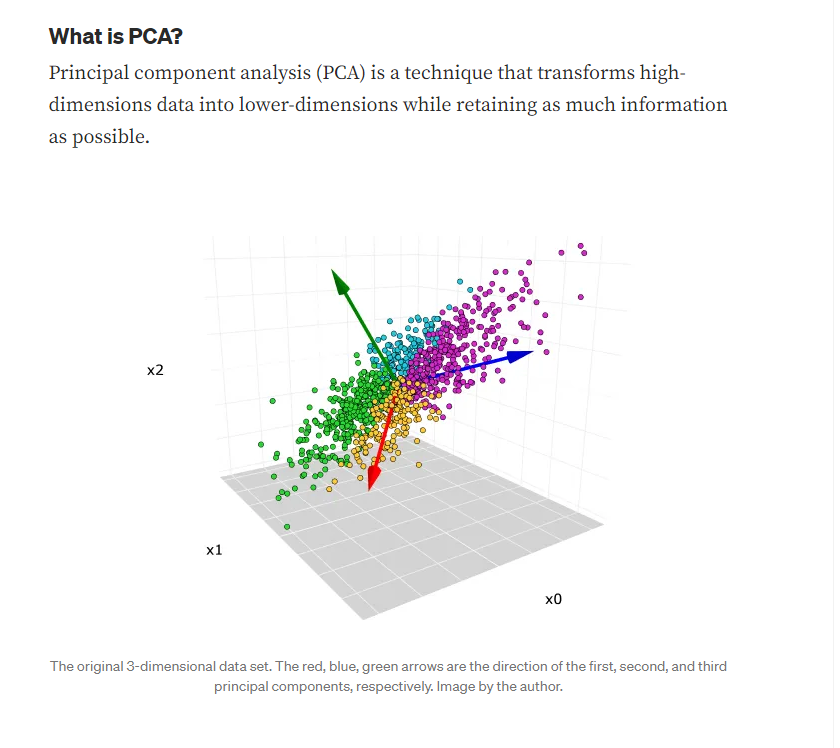

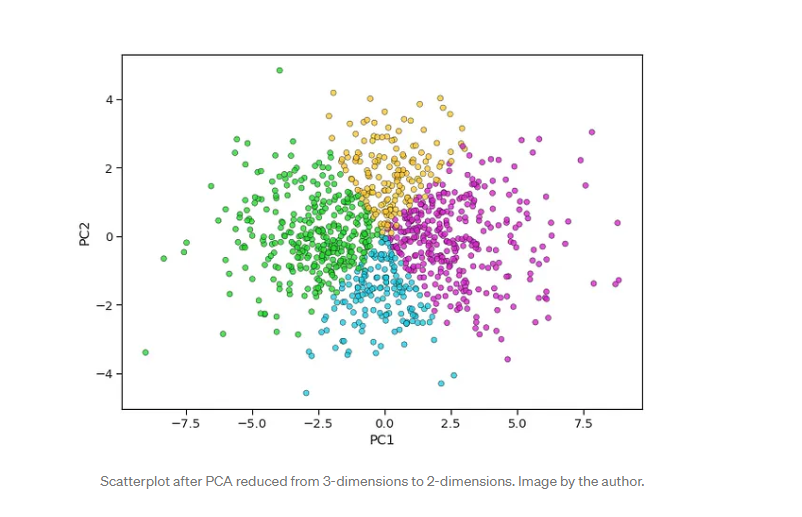

 For more on the topic of PCA: <a href='https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d'> Towards DataScience</a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# This filters ALL warnings, but you can also filter by category
import warnings
warnings.filterwarnings("ignore")

# Filtering by category:
warnings.filterwarnings("ignore",category=DeprecationWarning)

<h3><b>Data source:</b></h3>
<a href="https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud"> Machine Learning Group ULB</a>  on Kaggle.

In [2]:
# read the dataset
data = pd.read_csv("Bank Customer Churn Prediction.csv")

<h3><b>Explore EDA:</b></h3>

In [3]:
# examine the first 10 rows
data = data.copy()
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# customer id has no predictive power
data = data.drop(['customer_id', 'gender'], axis=1)

In [5]:
# check unique value of each columns
data.nunique()

credit_score         460
country                3
age                   70
tenure                11
balance             6382
products_number        4
credit_card            2
active_member          2
estimated_salary    9999
churn                  2
dtype: int64

In [6]:
# check for missing values
data.isna().sum()

credit_score        0
country             0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [7]:
# check data types
data.dtypes

credit_score          int64
country              object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

In [8]:
# create a copu of the data
data = data.copy()
data.columns

Index(['credit_score', 'country', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

<h3><b>Preprocess with sklearn StandardScaler:</b></h3>

In [9]:
# import standard scaler to 
from sklearn.preprocessing import StandardScaler

In [10]:
# instatiate the standard scaler
scaler = StandardScaler()

In [11]:
# oneHot encode the values
data_dummies = pd.get_dummies(data, drop_first=True)

In [12]:
# fit the dataset
scaler.fit(data_dummies)

StandardScaler()

In [13]:
# transform the dataset
scaled_data = scaler.transform(data_dummies)

<h3><b>PCA:</b></h3>

In [27]:
# PCA
from sklearn.decomposition import PCA

In [28]:
# instatiate the pca and number of components
pca = PCA(n_components= 2)

In [29]:
# fit the dataset to the pca
pca.fit(data_dummies)

PCA(n_components=2)

In [30]:
# transform the dataset
x_pca = pca.transform(scaled_data)

In [31]:
# shape of the dataset
scaled_data.shape

(10000, 11)

In [32]:
# after pca
x_pca.shape

(10000, 2)

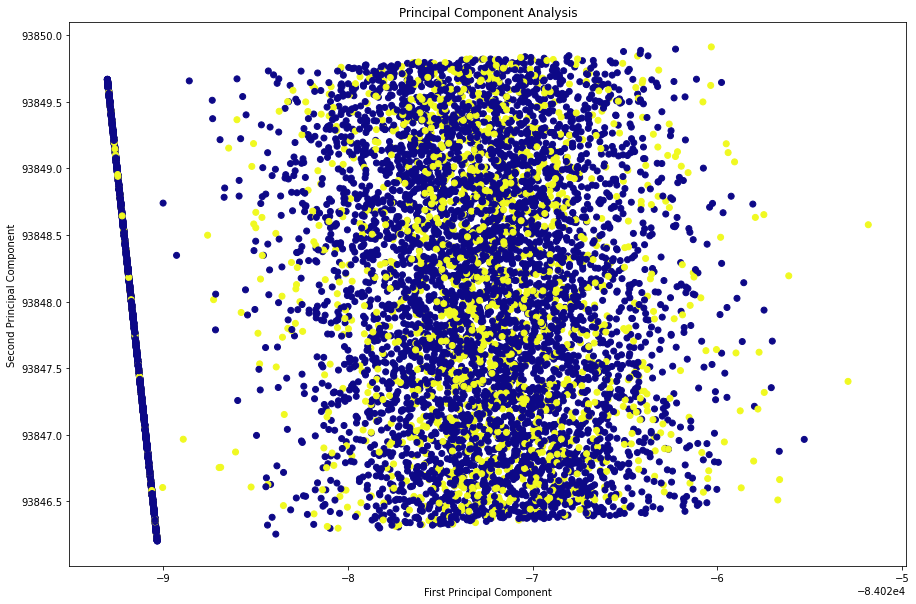

In [33]:
# plot the components
plt.figure(figsize=(15,10))
plt.scatter(x_pca[:,0], x_pca[:,1],c=data['churn'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Principal Component Analysis');

In [34]:
# examine the values
pca.components_

array([[ 9.51816562e-06,  4.65281356e-06, -5.39944291e-07,
         9.96979873e-01, -2.81486667e-06, -1.13309082e-07,
        -8.69970340e-08,  7.76603729e-02,  7.67689358e-07,
         2.78116284e-06, -9.32788075e-07],
       [ 3.21058039e-06,  1.74611085e-06, -4.42665725e-07,
         7.76603728e-02, -4.02880589e-07,  6.86475509e-08,
         9.16735326e-08, -9.96979873e-01, -1.45324519e-08,
         1.77587451e-07, -3.68449116e-08]])

In [35]:
# create a dataframe with dummies column names assigned 
df_comp = pd.DataFrame(pca.components_, columns = list(data_dummies.columns))

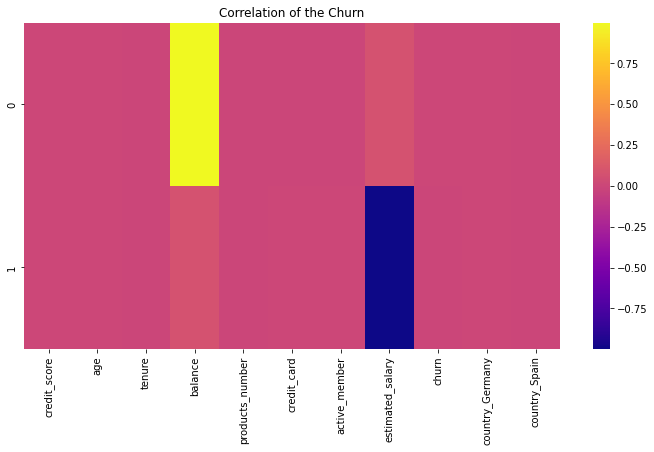

In [36]:
# plot the correlation of the features to the churn class 0, 1 
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, cmap='plasma')
plt.title('Correlation of the Churn');